# Scaling Analysis Examples TTbar70

Authors: Brain Gravelle and Boyana Norris


All this is using the taucmdr python libraries from paratools
http://taucommander.paratools.com/

<a href='#top'>top</a><br>
<a href='#data'>Loading Data</a><br>
<a href='#metrics'>Metrics</a><br>
<a href='#corr'>Correlations</a><br>
<a href='#stl_sb'>Store Buffer Stalls</a><br>
<a href='#fetch_stalls'>Fetch Stalls</a><br>
<a href='#l3'>l3 misses</a><br>

## Imports
This section imports necessary libraries, the metrics.py and utilities.py files and sets up the window.


<a id='top'></a>

In [2]:
# A couple of scripts to set the environent and import data from a .tau set of results
from utilities import *
from metrics import *
# Plotting, notebook settings:
%matplotlib inline  
#plt.rcParams.update({'font.size': 16})
import numbers
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.2e' % x)
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth', 70)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import copy, shelve

In [5]:
application = "pennant"
exp = "example"

data = load_perf_data(application,exp,nolibs=False,scaling=True,callpaths=True,data_dir="tau")

Found: 7 trials with 0 errors




In [7]:
print data.keys()
print data[80].keys()

[80]
['PAPI_L2_TCA', 'PAPI_VEC_DP', 'PAPI_L2_TCM', 'PAPI_VEC_SP', 'PAPI_LST_INS', 'PAPI_L1_TCM', 'PAPI_TOT_CYC', 'METADATA']


In [6]:
data_sorted = data[32]['PAPI_TOT_CYC'][['Exclusive']].sort_values(by='Exclusive',ascending=False)
data_sorted.head(20)

Exclusive
context thread region                                                                           
0       25     [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   5.90e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.90e+09
        26     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.83e+09
               [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   5.83e+09
        30     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.48e+09
               [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   5.48e+09
        23     [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   5.15e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   5.15e+09
        27     [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.98e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.98e+09
        24     [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.62e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.62e+09
        6      [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.42e+09
               [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.42e+09
        1      [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.18e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.18e+09
        14     [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.13e+09
               [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.13e+09
        7      [SUMMARY] bool _INTERNAL_25_______src_kmp_barrier_cpp_38a91946::__k...   4.10e+09
               [SUMMARY] .TAU application  => [CONTEXT] .TAU application  => [SAMP...   4.10e+09

In [14]:
alldata = combine_metrics(data,inc_exc='Exclusive')

cm = sns.light_palette("yellow", as_cmap=True)
metric_li = ['PAPI_L2_TCA', 'PAPI_VEC_DP', 'PAPI_L2_TCM', 'PAPI_VEC_SP', 'PAPI_LST_INS', 'PAPI_L1_TCM', 'PAPI_TOT_CYC']
corr_data = copy.deepcopy(alldata)
corr_data = corr_data[corr_data.index.get_level_values('region').str.contains('FindCandidatesClone')]
# corr_data.head(10)
correlations_pearson = alldata.corr('pearson').fillna(0)    # Other methods: 'kendall', 'spearman'
correlations_pearson.style.format("{:.2%}").background_gradient(cmap=cm)

,PAPI_TOT_CYC,PAPI_L2_TCA,PAPI_VEC_DP,PAPI_L2_TCM,PAPI_VEC_SP,PAPI_LST_INS,PAPI_L1_TCM
PAPI_TOT_CYC,100.00%,96.28%,84.88%,89.75%,0.00%,86.20%,95.52%
PAPI_L2_TCA,96.28%,100.00%,86.71%,91.00%,0.00%,87.42%,96.04%
PAPI_VEC_DP,84.88%,86.71%,100.00%,94.65%,0.00%,94.41%,85.01%
PAPI_L2_TCM,89.75%,91.00%,94.65%,100.00%,0.00%,94.50%,89.93%
PAPI_VEC_SP,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
PAPI_LST_INS,86.20%,87.42%,94.41%,94.50%,0.00%,100.00%,85.95%
PAPI_L1_TCM,95.52%,96.04%,85.01%,89.93%,0.00%,85.95%,100.00%


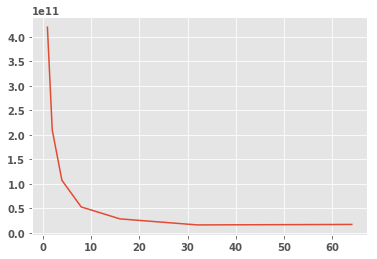

In [10]:
thread_list, tot_cyc_list = scaling_plot(data, function="\[SUMMARY\] .TAU application$", max=False)